# INITIALIZATION

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IMPORTING DATASET:

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#IMPOETING THE DATASET:
df=pd.read_csv("bank-full.csv",sep=';')
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [4]:
#INSPECTING DATASET:
df.shape


(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# selecting revelant coumn
features=['age', 'job', 'marital', 'education', 'balance', 'housing','contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']


In [7]:
df=df[features]
df

age           job   marital  education  balance housing    contact  \
0       58    management   married   tertiary     2143     yes    unknown   
1       44    technician    single  secondary       29     yes    unknown   
2       33  entrepreneur   married  secondary        2     yes    unknown   
3       47   blue-collar   married    unknown     1506     yes    unknown   
4       33       unknown    single    unknown        1      no    unknown   
...    ...           ...       ...        ...      ...     ...        ...   
45206   51    technician   married   tertiary      825      no   cellular   
45207   71       retired  divorced    primary     1729      no   cellular   
45208   72       retired   married  secondary     5715      no   cellular   
45209   57   blue-collar   married  secondary      668      no  telephone   
45210   37  entrepreneur   married  secondary     2971      no   cellular   

       day month  duration  campaign  pdays  previous poutcome    y  
0        5   may       261         1     -1         0  unknown   no  
1        5   may       151         1     -1         0  unknown   no  
2        5   may        76         1     -1         0  unknown   no  
3        5   may        92         1     -1         0  unknown   no  
4        5   may       198         1     -1         0  unknown   no  
...    ...   ...       ...       ...    ...       ...      ...  ...  
45206   17   nov       977         3     -1         0  unknown  yes  
45207   17   nov       456         2     -1         0  unknown  yes  
45208   17   nov      1127         5    184         3  success  yes  
45209   17   nov       508         4     -1         0  unknown   no  
45210   17   nov       361         2    188        11    other   no  

[45211 rows x 15 columns]

In [8]:
#checking for missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# EXPLORATORY DATA ANALYSIS:

In [9]:
# DATAFRAME INFORMATION:
df.describe(include=['O'])

job  marital  education housing   contact  month poutcome  \
count         45211    45211      45211   45211     45211  45211    45211   
unique           12        3          4       2         3     12        4   
top     blue-collar  married  secondary     yes  cellular    may  unknown   
freq           9732    27214      23202   25130     29285  13766    36959   

            y  
count   45211  
unique      2  
top        no  
freq    39922

In [10]:
# CALCULATING MODEL:
mode=df['education'].mode()
mode

0    secondary
dtype: object

- Answer for Question 1:secondary

In [11]:
#INSPECTING DATASET:
df_numeric=df.copy()
df_numeric=df_numeric.drop(['job','marital','education','housing','contact','duration','poutcome','y'],axis=1)
df_numeric.describe()

age        balance           day      campaign         pdays  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419      2.763841     40.197828   
std       10.618762    3044.765829      8.322476      3.098021    100.128746   
min       18.000000   -8019.000000      1.000000      1.000000     -1.000000   
25%       33.000000      72.000000      8.000000      1.000000     -1.000000   
50%       39.000000     448.000000     16.000000      2.000000     -1.000000   
75%       48.000000    1428.000000     21.000000      3.000000     -1.000000   
max       95.000000  102127.000000     31.000000     63.000000    871.000000   

           previous  
count  45211.000000  
mean       0.580323  
std        2.303441  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000

In [12]:
#INSPECTING CORRELATION:
df_numeric.corr()

age   balance       day  campaign     pdays  previous
age       1.000000  0.097783 -0.009120  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000  0.162490 -0.093044 -0.051710
campaign  0.004760 -0.014578  0.162490  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710 -0.032855  0.454820  1.000000

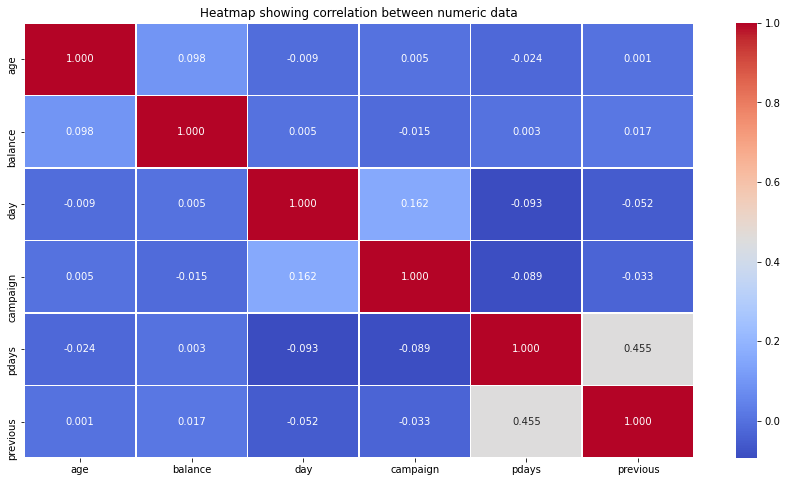

In [13]:
#INSPECTING HEATMAP:
plt.figure(figsize=(15,8))
sns.heatmap(df_numeric.corr(),cmap='coolwarm',annot=True,linewidth=0.5,fmt='0.3f')
plt.title('Heatmap showing correlation between numeric data')
plt.show()

In [14]:
#INSPECTING HEATMAP:
df_numeric.corr().unstack().sort_values(ascending=False)

previous  previous    1.000000
pdays     pdays       1.000000
balance   balance     1.000000
day       day         1.000000
campaign  campaign    1.000000
age       age         1.000000
pdays     previous    0.454820
previous  pdays       0.454820
campaign  day         0.162490
day       campaign    0.162490
age       balance     0.097783
balance   age         0.097783
previous  balance     0.016674
balance   previous    0.016674
campaign  age         0.004760
age       campaign    0.004760
balance   day         0.004503
day       balance     0.004503
pdays     balance     0.003435
balance   pdays       0.003435
previous  age         0.001288
age       previous    0.001288
          day        -0.009120
day       age        -0.009120
balance   campaign   -0.014578
campaign  balance    -0.014578
age       pdays      -0.023758
pdays     age        -0.023758
previous  campaign   -0.032855
campaign  previous   -0.032855
previous  day        -0.051710
day       previous   -0.051710
campaign

- Answer for Question 2:pdays and previous

# MUTUAL INFORMATION:



In [15]:
#PREPARING DATASET:
df_class=df.copy()
df.y = (df_class.y == 'yes').astype(int)
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [16]:
#SPLITTING THE DATASET:
SEED=42
df_full_train,df_test=train_test_split(df_class,test_size=0.20,random_state=SEED)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=SEED)

In [17]:
#PROCESSING THE DATASET:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [18]:
#PROCESSING THE DATASET:
y_train=df_train.y.values
y_test=df_test.y.values
y_val=df_val.y.values

In [19]:
#DEFINING FUNCTION:
def calculate_m(series):
    return mutual_info_score(series,df_train.y)

In [20]:
#PREPARING DATASET:
cat=['job','marital','education','housing','contact','duration','poutcome','y']
cat

['job',
 'marital',
 'education',
 'housing',
 'contact',
 'duration',
 'poutcome',
 'y']

In [21]:
#IMPLEMENTATION:
mi=df_train[cat].apply(calculate_m)
mi=mi.sort_values(ascending=False).to_frame(name='MI')
mi

MI
y          0.357483
duration   0.099877
poutcome   0.029533
contact    0.013356
housing    0.010343
job        0.007316
education  0.002697
marital    0.002050

- Answer for Question 3:poutcome	0.029533

# CLASSIFICATION AND ACCURACY OF MODEL:



In [22]:
#PREPARING THE DATASET:
df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

In [23]:
#TRANSFORMING THE DATASET:
cat=['job','marital','education','housing','contact','duration','poutcome','y']
num=['age','balance','day','month','campaign','pdays','previous']
train_dict=df_train.to_dict(orient='records')

In [24]:
# VECTORIZING THE DATASET:
dv=DictVectorizer(sparse=False)
X_train=dv.fit_transform(train_dict)

In [25]:
#TRAINING LOGISTIC REGRESSSION MODEL:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [26]:
#NITIALIZING THE MODEL PREDICTION:
train_val=df_val.to_dict(orient='records')
X_val=dv.transform(train_val)
y_pred=model.predict(X_val)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [27]:
# INSPECTING THE ACCURACY:
accuracy=np.round(accuracy_score(y_val,y_pred),2)
accuracy

0.9

- Answer for Question 4:Accuracy is 0.9

# FEATURE ELIMINATION:



In [28]:
# INITIALIZING FEATURES:
features=num+cat
features

['age',
 'balance',
 'day',
 'month',
 'campaign',
 'pdays',
 'previous',
 'job',
 'marital',
 'education',
 'housing',
 'contact',
 'duration',
 'poutcome',
 'y']

In [29]:
#INSPECTING THE DIFFERENCE IN ACCURACY:
origin_score=accuracy
for c in features :
    subset=features.copy()
    subset.remove(c)
    dv=DictVectorizer(sparse=False)
    train_dict=df_train.to_dict(orient='records')
    X_train=dv.fit_transform(train_dict)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train,y_train)
    val_dict=df_val.to_dict(orient='records')
    X_val=dv.transform(val_dict)
    y_pred=model.predict(X_val)
    score=accuracy_score(y_val,y_pred)
    print(c,origin_score-score,score)
    


age -0.001570449015704467 0.9015704490157045
balance -0.001570449015704467 0.9015704490157045
day -0.001570449015704467 0.9015704490157045
month -0.001570449015704467 0.9015704490157045
campaign -0.001570449015704467 0.9015704490157045
pdays -0.001570449015704467 0.9015704490157045
previous -0.001570449015704467 0.9015704490157045
job -0.001570449015704467 0.9015704490157045
marital -0.001570449015704467 0.9015704490157045
education -0.001570449015704467 0.9015704490157045
housing -0.001570449015704467 0.9015704490157045
contact -0.001570449015704467 0.9015704490157045
duration -0.001570449015704467 0.9015704490157045
poutcome -0.001570449015704467 0.9015704490157045
y -0.001570449015704467 0.9015704490157045


- Answer for Question 5:smallest difference - marital.

# RIDGE REGRESSION:



In [30]:
#SPLITTING THE DATASET:
SEED=42
df_full_train,df_test=train_test_split(df,test_size=0.20,random_state=SEED)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=SEED)

In [31]:
# PREPARING THE DATASET:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)


In [32]:
# PREPARING THE DATASET:
y_train=df_train.y.values
y_test=df_test.y.values
y_val=df_val.y.values

In [33]:
#DELETING DATASET:
del df_train['y']
del df_test['y']
del df_val['y']

In [34]:
#VECTORIZING THE DATASET:
dv=DictVectorizer(sparse=True)
train_dict=df_train.to_dict(orient='records')
X_train=dv.fit_transform(train_dict)

Val_dict=df_val.to_dict(orient='records')
X_val=dv.transform(Val_dict)

In [35]:
#RIDGE REGRESSION IMPLEMENTATION:

for c in [0.01, 0.1, 1, 10, 100]:
    model=Ridge(alpha=c,solver='auto',random_state=SEED)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_val)
    score=np.sqrt(mean_squared_error(y_val, y_pred, squared=False))
    score=round(score,3)
    print(f"c={c}:\t RMSE={score}") 
    

c=0.01:	 RMSE=0.532
c=0.1:	 RMSE=0.532
c=1:	 RMSE=0.532
c=10:	 RMSE=0.532
c=100:	 RMSE=0.532


- Answer for Question 5:Smallest c that leads to the best accuracy on the validation set :c=0.01:	 RMSE=0.532